# Dimensionality Reduction Techniques

This notebook consists in exploring some dimensionality reduction techniques as PCA, t-SNE, and MDS. 

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sn
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from pandas.plotting import scatter_matrix
from sklearn import datasets
plt.style.use("bmh")

### General Methods for DR Algorithms

In [2]:
def plot_PCA(data, labels):
    pca = decomposition.PCA(n_components = 2)
    pca_data = pca.fit_transform(data)
    pca_data = np.vstack((pca_data.T, labels)).T
    df = pd.DataFrame(data=pca_data, columns=("dim1", "dim2", "Label"))
    sn.FacetGrid(df, hue="Label", height=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("PCA")
    plt.show()

In [17]:
def plot_tSNE(data, labels, perplexity=[5,20,30,50]):
    kl_divergence_iris = []
    fig, ax = plt.subplots(1, 4, figsize=(40, 8))
    for idx, p in enumerate(perplexity):
        tsne = TSNE(n_components=2, random_state=0, perplexity=p)
        tsne_data = tsne.fit_transform(data)
        kl_divergence_iris.append(tsne.kl_divergence_)
        tsne_data = np.vstack((tsne_data.T, labels)).T
        df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "Label"))
        sn.scatterplot(x=df['dim1'], y=df['dim2'], hue=df["Label"], ax=ax[idx], s=50,palette='colorblind').set_title("t-SNE with perplexity="+str(p))
    plt.show()

In [4]:
def plot_MDS(data, labels):
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data)
    mds_data_iris = np.vstack((mds_data.T, labels)).T
    df = pd.DataFrame(data=mds_data_iris, columns=("dim1", "dim2", "Label"))
    sn.FacetGrid(df, hue="Label", height=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("MDS with final stress=" + str(mds.stress_))
    plt.show()

### Load Data

In [5]:
db = datasets.load_iris()
dataset_iris = pd.DataFrame(db.data, columns=db.feature_names)
dataset_iris["Species"] = db.target
dataset_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
labels_iris = dataset_iris['Species']
data_iris = dataset_iris.drop("Species",axis=1)
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Breast Cancer Data Set

In [7]:
db = datasets.load_breast_cancer()
dataset_cancer = pd.DataFrame(db.data, columns=db.feature_names)
dataset_cancer["diagnosis"] = db.target
dataset_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
labels_cancer = dataset_cancer['diagnosis']
data_cancer = dataset_cancer.drop("diagnosis",axis=1)
data_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Initialize Models

# Iris Dataset Analysis

## PCA

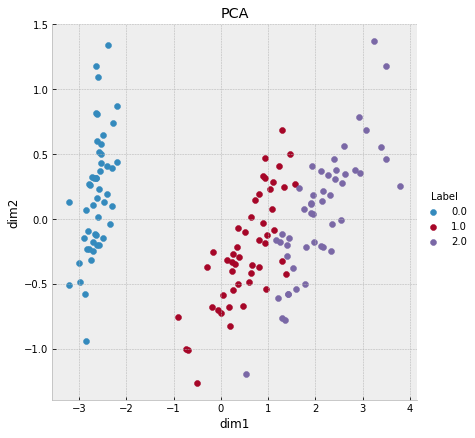

In [9]:
plot_PCA(data_iris,labels_iris)

## t-SNE

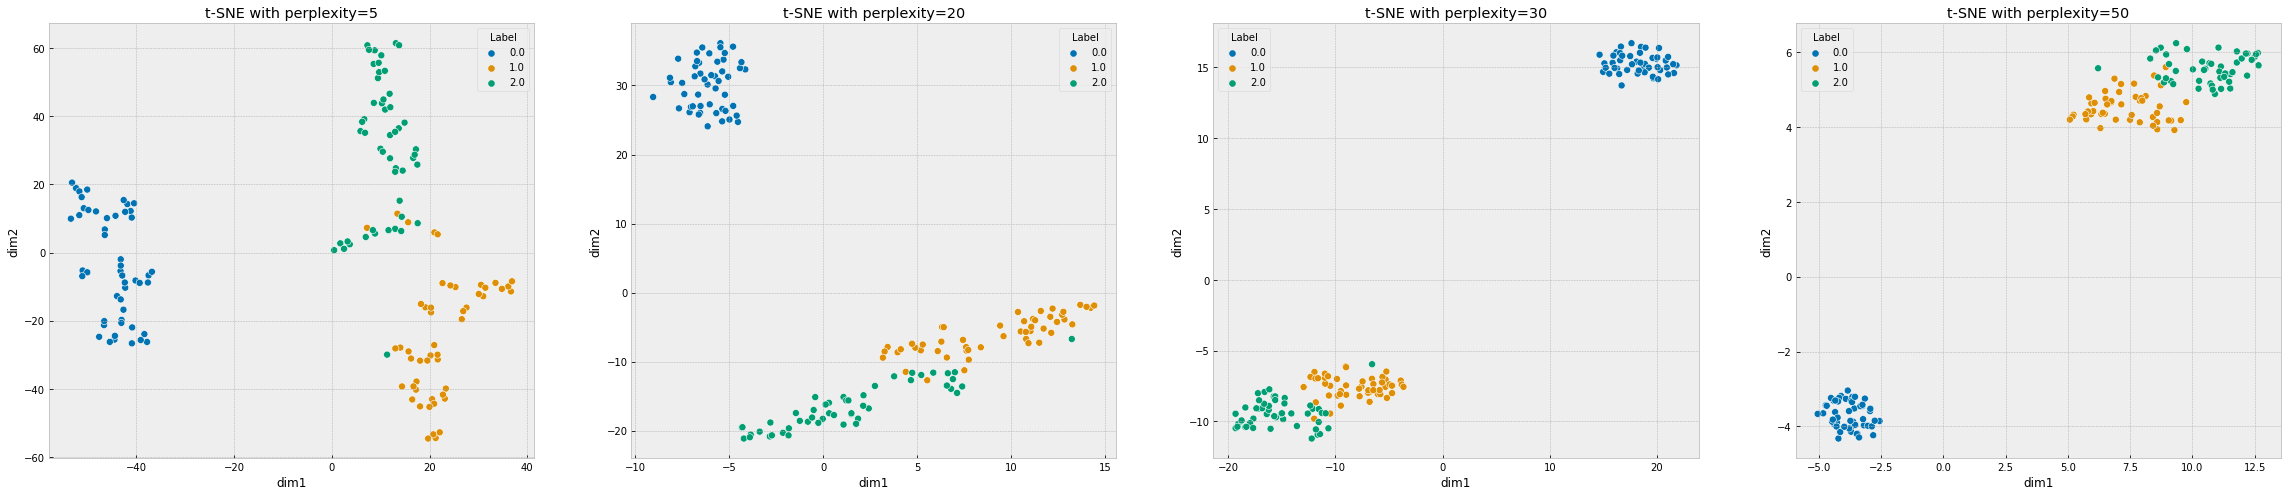

In [18]:
plot_tSNE(data_iris,labels_iris)

## MDS

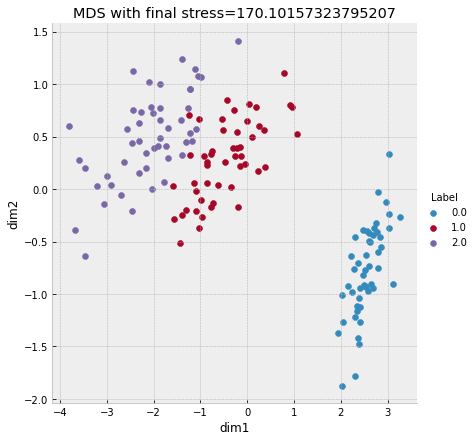

In [19]:
plot_MDS(data_iris, labels_iris)

# Breast Cancer Winsconsin Dataset

## PCA

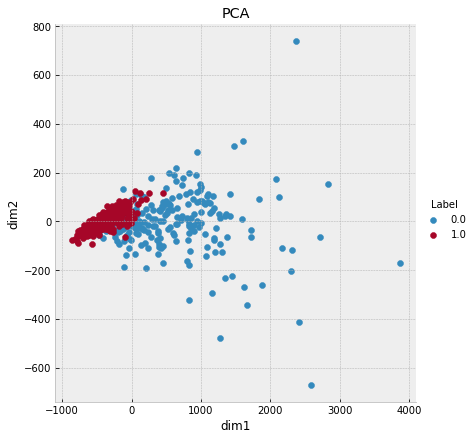

In [12]:
plot_PCA(data_cancer,labels_cancer)

## t-SNE

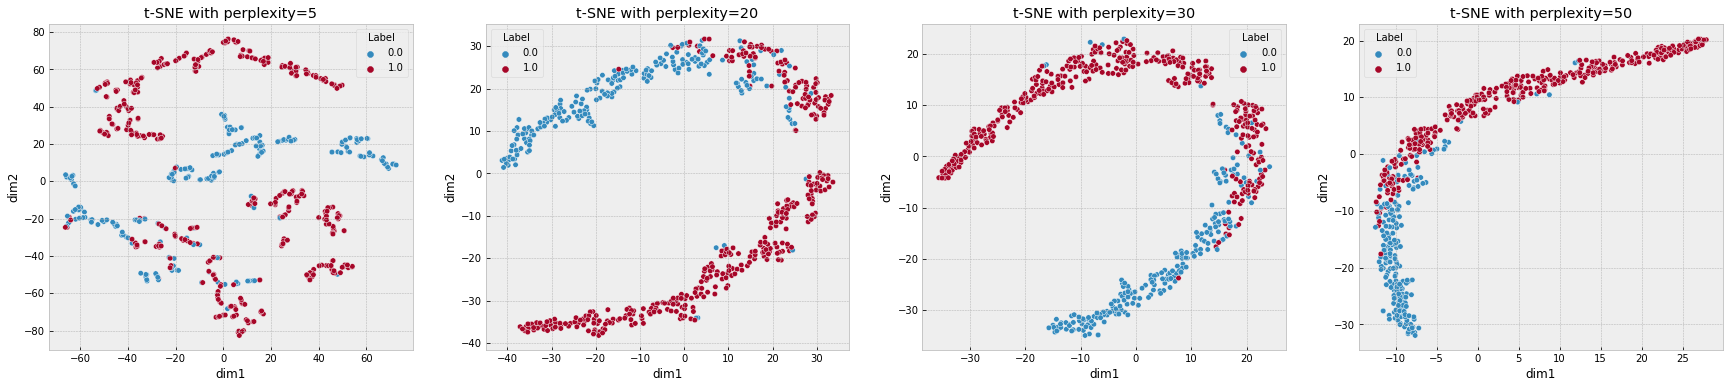

In [13]:
plot_tSNE(data_cancer,labels_cancer)

## MDS

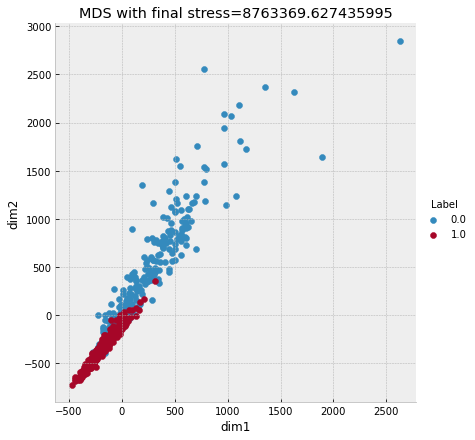

In [14]:
plot_MDS(data_cancer, labels_cancer)